In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
file_path="crypto_data.csv"
df = pd.read_csv('crypto_data.csv', index_col=0)

In [3]:
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
df=df[df["IsTrading"]==True]
df=df.drop("IsTrading",axis=1)
df=df.dropna()
df=df[df["TotalCoinsMined"]>0]
df=df.drop("CoinName",axis=1)
# df=df.drop("Unnamed: 0",axis=1)

In [5]:
df["TotalCoinSupply"] = pd.to_numeric(df["TotalCoinSupply"])

In [6]:
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [7]:
df=pd.get_dummies(df)

In [8]:
df.shape

(532, 98)

In [9]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [10]:
pca = PCA(n_components=0.9)
pca = pca.fit_transform(df_scaled)
pca.shape

(532, 74)

In [11]:
tsne = TSNE(learning_rate=90)
tsne_features = tsne.fit_transform(pca)
tsne_features.shape

(532, 2)

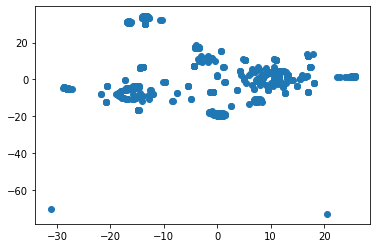

In [12]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

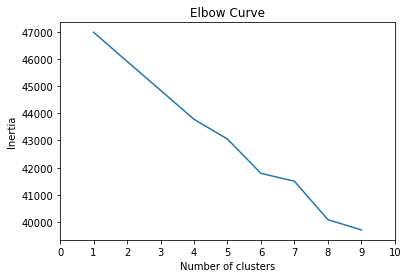

In [13]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
model = KMeans(n_clusters=6, random_state=0)

# Fit the model
model.fit(pca)

# Predict clusters
predictions = model.predict(pca)


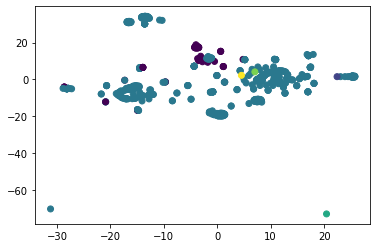

In [15]:
plt.scatter(tsne_features[:,0], tsne_features[:,1],c=predictions)

Its very hard to markdown cryptocurrency into clusters but they can be roughly separated into 5 clusters.